Advanced Project Questions – Delhi Air Quality Dataset
What is the statistical correlation between PM2.5, PM10, NO2, and AQI?

Objective: Understand how specific pollutants influence AQI levels using correlation matrices and scatter plots.

Can you build a multiple linear regression model to predict AQI using PM2.5, PM10, NO2, SO2, CO, and Ozone?

Involves regression modeling, evaluating R², and checking multicollinearity with VIF.

Is there a significant difference in AQI levels on holidays vs. non-holidays?

Use hypothesis testing (t-test or ANOVA) to determine the statistical difference.

Cluster the days using air quality features – which patterns emerge in pollution types?

Apply K-Means or Hierarchical Clustering to group similar pollution days.

Does the number of days passed in the month have any trend with AQI levels?

Analyze if pollution tends to increase or decrease as the month progresses.

Which pollutant has the highest average influence on AQI during the dataset period?

Normalize values and compute contribution or perform feature importance via a regression model.

Detect outlier days in terms of AQI using statistical methods (IQR, Z-score). What caused them?

Identify spikes in AQI and analyze their contributing pollutants.

Build a time series trend using the date to detect any short-term seasonality in AQI or PM2.5.

Use rolling averages or decomposition to observe hidden patterns.

What is the pollution difference between weekdays and weekends in terms of AQI and gases?

Derive the weekday from date and visualize pollutant changes.

Can you build a classification model to classify AQI into 'Good', 'Moderate', 'Unhealthy', etc.?

Use AQI thresholds and train a classifier (like Random Forest or Logistic Regression).

Is Ozone positively or negatively correlated with other pollutants in Delhi’s air quality?

Perform pairwise correlation and analyze Ozone's behavior as a secondary pollutant.

Visualize a pollution heatmap over time: How do different gases behave across the dataset?

Create a heatmap of days vs pollutants to detect co-spikes or dips.

Can PCA (Principal Component Analysis) reduce dimensionality while keeping variance in AQI data?

Apply PCA and visualize how much variance each component holds.

Do extreme AQI values correspond to extreme values of a single pollutant?

Segment top 10% AQI days and analyze which pollutant spikes with them.

How does Delhi's AQI on holidays differ from the day after the holiday?

Time-lagged comparison to analyze if holidays lead to cleaner air.

Would you like code examples or visualizations for any of these projects?








You said:
give me some mid level eda questions


ChatGPT said:
Here are some mid-level EDA (Exploratory Data Analysis) questions for your Delhi air quality dataset. These will help you explore trends, distributions, and relationships in the data without diving into advanced modeling:

📊 Mid-Level EDA Questions for Air Quality Dataset
What are the average values of each pollutant (PM2.5, PM10, NO2, etc.) for the given time period?

What is the daily trend of AQI for the first week of January 2021?

Which day had the highest and lowest AQI, and what were the pollutant levels on those days?

Is there any pattern in AQI values with respect to the number of days passed (column Days)?

How do pollutant levels vary on holidays versus non-holidays?

What is the distribution (histogram) of each pollutant across the dataset? Are they normally distributed or skewed?

Create a correlation heatmap – which pollutants are strongly correlated with each other?

How does AQI relate to PM2.5 and PM10? Can you visualize this relationship using scatter plots?

What is the pollutant-wise contribution to AQI on high-AQI days (say AQI > 300)?

How does Ozone concentration change when PM2.5 is high (above 300)?

Are there any missing or outlier values in the dataset? If so, how should they be handled?

What is the ratio of gaseous pollutants (SO2, CO, NO2, Ozone) vs particulate matter (PM2.5 and PM10) on each day?

Create a line plot for PM2.5 and PM10 across the 6 days – do they follow a similar trend?

On which days was CO lowest and highest? What were the AQI values on those days?

Check if there’s a pattern in AQI for different values of Days (e.g., higher on weekends?).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_dataset.csv")

In [3]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


<Axes: xlabel='Year', ylabel='AQI'>

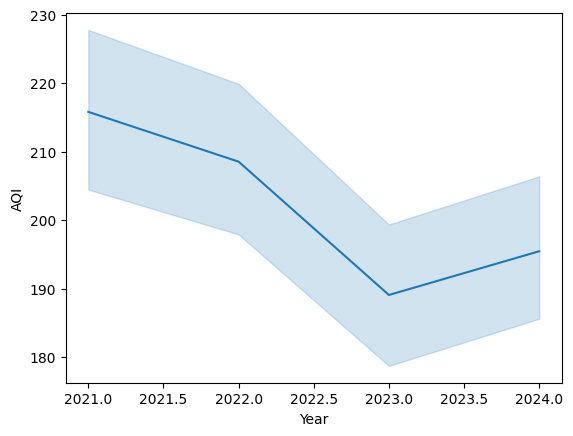

In [5]:
sns.lineplot(x=df['Year'],y=df['AQI'])

In [6]:
df['date'] = pd.to_datetime(
    df.apply(
    lambda x: str(int(x['Date']))+"-"+str(int(x['Month']))+"-"+str(int(x['Year'])),
    axis =1
),
    format = "%d-%m-%Y"
)

In [7]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05


<Axes: xlabel='date', ylabel='AQI'>

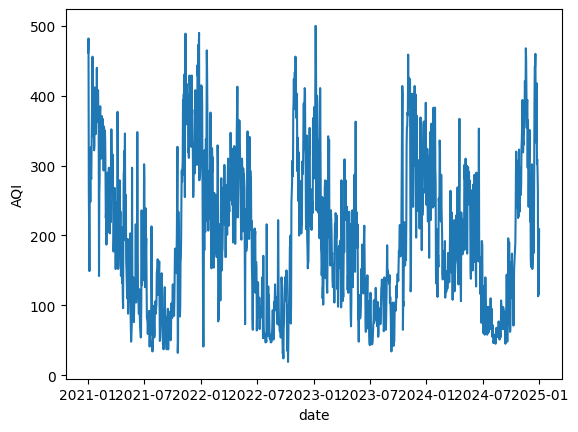

In [8]:

sns.lineplot(
    data= df,
    x='date',
    y = 'AQI',

)

<Axes: xlabel='Month'>

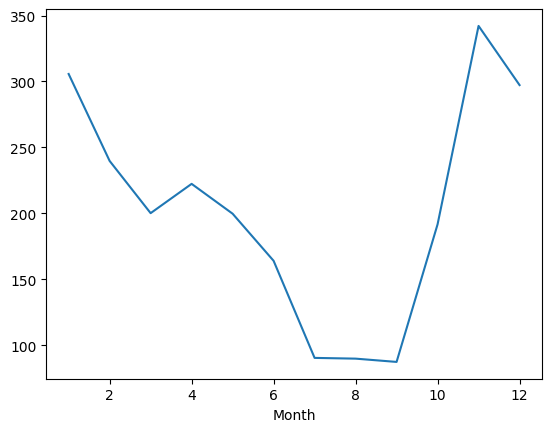

In [9]:
df.groupby("Month")['AQI'].mean().plot()

<Axes: xlabel='Month', ylabel='AQI'>

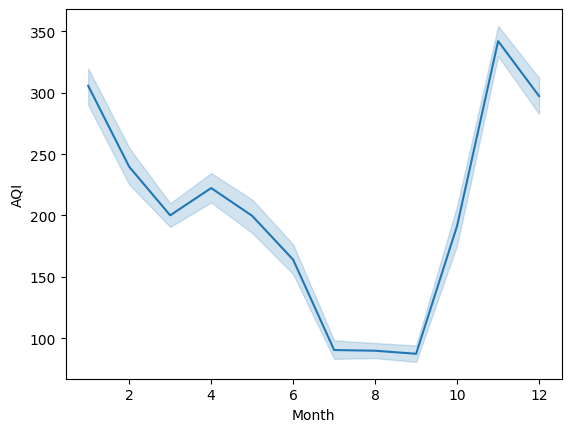

In [10]:
sns.lineplot(data=df,x='Month',y="AQI")

In [11]:
df['month-year'] =  df.apply(
    lambda x :str(int(x['Year']))+"-"+str(int(x['Month'])),
    axis=1
)

In [12]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date,month-year
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,2021-1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,2021-1
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,2021-1
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,2021-1
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,2021-1


In [41]:
sns.set_theme(style='ticks', palette="deep", font_scale=0.8)

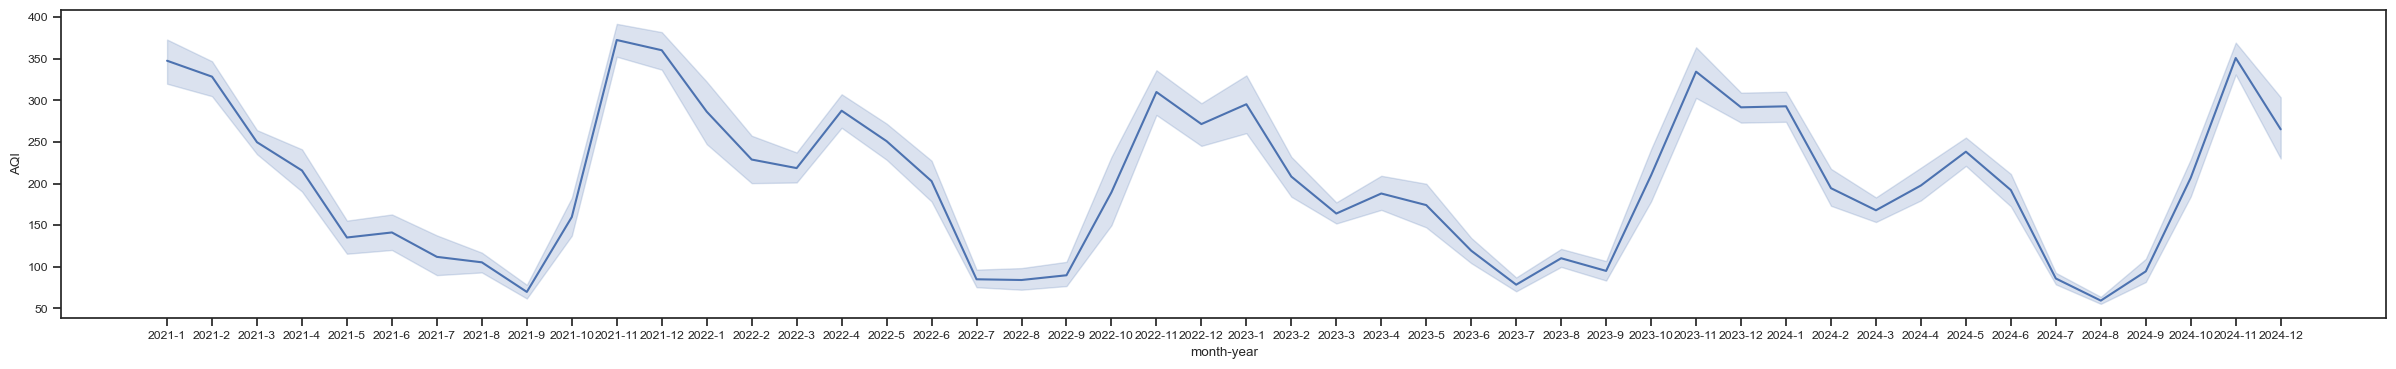

In [46]:
plt.figure(figsize=(30,4))
sns.lineplot(data=df,x='month-year',y='AQI')
plt.savefig("fig.png")

In [14]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date,month-year
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,2021-1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,2021-1
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,2021-1
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,2021-1
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,2021-1


In [15]:
df.groupby("Holidays_Count")['AQI'].mean()

Holidays_Count
0    202.187500
1    202.310469
Name: AQI, dtype: float64

In [16]:
df['prv day'] = df['AQI'].shift(1)

In [22]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date,month-year,prv day,change
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,2021-1,NaN,NaN
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,2021-1,462.0,20.0
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,2021-1,482.0,-219.0
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,2021-1,263.0,-56.0
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,2021-1,207.0,-58.0


In [19]:
df['change'] = df['AQI'] - df['prv day']

In [23]:
df.groupby("Holidays_Count")['change'].std()

Holidays_Count
0    56.049152
1    51.477615
Name: change, dtype: float64

In [24]:
df['abs change'] = abs(df['change'])

In [25]:
df['n or p'] = df['change'].apply(
    lambda x : "negative" if x<0 else "positive"
)

In [26]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date,month-year,prv day,change,abs change,n or p
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01,2021-1,NaN,NaN,NaN,positive
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02,2021-1,462.0,20.0,20.0,positive
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03,2021-1,482.0,-219.0,219.0,negative
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04,2021-1,263.0,-56.0,56.0,negative
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05,2021-1,207.0,-58.0,58.0,negative


In [28]:
df.pivot_table(index='Holidays_Count',columns='n or p', values='abs change').round()

n or p,negative,positive
Holidays_Count,,
0,43.0,38.0
1,38.0,36.0


In [30]:
df.groupby("Days")['AQI'].mean().round()

Days
1    198.0
2    204.0
3    204.0
4    203.0
5    204.0
6    201.0
7    202.0
Name: AQI, dtype: float64